https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=es

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 10 neuronas de salida con sigmoides (clasificación)
y_pred = [0.1, 0, 0, 0.2, 0.7, 0, 0, 0, 0, 0]  # One-Hot encoder
y_real = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [ ]:
# 1 neurona de salida (clasificación)
y_pred = 2
y_real = 4

In [ ]:
# 1 neurona de salida (regresión)
y_pred = 2458157
y_real = 4000000

### Softmax

Función de activación cuya salida es un array con valores entre el rango [[0, 1]] y cuya suma total debe ser 1.


In [2]:
# Construimos el modelo

# Las entradas van a tener 784 dimensiones en forma de vector (28x28)
inputs = keras.Input(shape=(784,), name="digits")
# Primera capa de la red, con 64 neuronas y usando ReLu
x1 = layers.Dense(64, activation="relu")(inputs)
# Segunda capa de la red, con 64 neuronas y usando ReLu
x2 = layers.Dense(32, activation="relu")(x1)
# La salida de la red con 10 neuronas porque estamos usando un algoritmo de clasificación de 10
# Softmax 
outputs = layers.Dense(10, activation="softmax", name="predictions")(x2)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
# Ejemplo de otra creación de capas (NO EJECUTAR)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    #layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation="softmax")
  ])

In [4]:
# Cogemos las imágenes de los dígitos y cogemos el conjunto de train, val y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
# Normalizamos la imagen dividiéndola por 255 y transformándola a imagen 28x28
to_show = (x_train[0]/255).reshape(28,28)
to_show

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

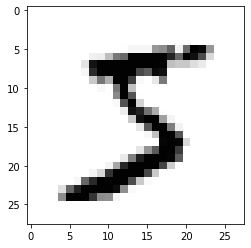

In [15]:
import matplotlib.pyplot as plt

plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [29]:
y_train[0]

5

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve the last 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [9]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [10]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 55,818
Trainable params: 55,818
Non-trainable params: 0
____________________________________________________

In [11]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/15
782/782 [==============================] - 1s 1ms/step - loss: 0.4085 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.1936 - val_sparse_categorical_accuracy: 0.9455
Epoch 2/15
782/782 [==============================] - 1s 971us/step - loss: 0.1769 - sparse_categorical_accuracy: 0.9482 - val_loss: 0.1531 - val_sparse_categorical_accuracy: 0.9566
Epoch 3/15
782/782 [==============================] - 1s 1ms/step - loss: 0.1319 - sparse_categorical_accuracy: 0.9614 - val_loss: 0.1362 - val_sparse_categorical_accuracy: 0.9615
Epoch 4/15
782/782 [==============================] - 1s 928us/step - loss: 0.1107 - sparse_categorical_accuracy: 0.9677 - val_loss: 0.1427 - val_sparse_categorical_accuracy: 0.9596
Epoch 5/15
782/782 [==============================] - 1s 908us/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9718 - val_loss: 0.1292 - val_sparse_categorical_accuracy: 0.9658
Epoch 6/15
782/782 [==============================] - 1s 919us/step

In [12]:
# Podemos ver el histórico que ha ocurrido cogiendo el mejor de cada epoch
history.history

{'loss': [0.40849828720092773,
  0.1769128292798996,
  0.13187168538570404,
  0.1107025220990181,
  0.09451299905776978,
  0.08132591843605042,
  0.07311682403087616,
  0.06339969485998154,
  0.05622926726937294,
  0.05151710286736488,
  0.045958373695611954,
  0.04294375330209732,
  0.04008543863892555,
  0.03668893128633499,
  0.03415855020284653],
 'sparse_categorical_accuracy': [0.8791199922561646,
  0.9481599926948547,
  0.9613999724388123,
  0.9677199721336365,
  0.9718000292778015,
  0.9762399792671204,
  0.9782000184059143,
  0.9803599715232849,
  0.9830600023269653,
  0.9844599962234497,
  0.9859399795532227,
  0.9870799779891968,
  0.9882400035858154,
  0.9887599945068359,
  0.989799976348877],
 'val_loss': [0.19361960887908936,
  0.15310712158679962,
  0.13618780672550201,
  0.14266686141490936,
  0.12919196486473083,
  0.12609246373176575,
  0.11218095570802689,
  0.11597441136837006,
  0.1293761432170868,
  0.12991894781589508,
  0.12977482378482819,
  0.13722191751003265,

In [13]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 731us/step - loss: 0.1354 - sparse_categorical_accuracy: 0.9705
test loss, test acc: [0.1353754997253418, 0.9704999923706055]


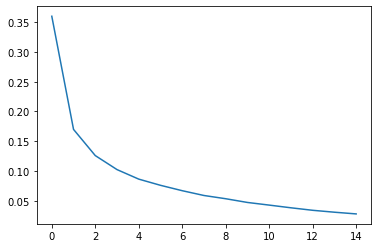

In [42]:
plt.plot(history.history["loss"])

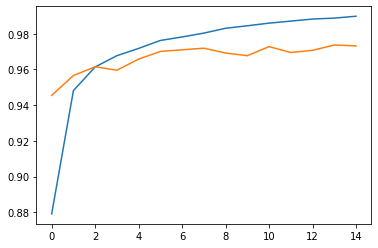

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

In [17]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:1])
print("predictions shape:", predictions.shape)
predictions

Generate predictions for 3 samples
predictions shape: (1, 10)


array([[7.0370210e-11, 1.3621887e-08, 2.6349035e-08, 1.3140357e-06,
        6.7988433e-09, 2.4539164e-08, 3.4153702e-12, 9.9999762e-01,
        8.8348653e-09, 1.1159842e-06]], dtype=float32)

In [18]:
predictions.max()

0.9999976

In [19]:
predictions.argmax()

7

In [20]:
y_test[:1]

array([7.], dtype=float32)

In [46]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
for i,image_predicted in enumerate(predictions):
    print("Image",i,":", image_predicted.argmax())
    #plt.imshow(x_test[2:3].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))

Generate predictions for 3 samples
predictions shape: (3, 10)
Image 0 : 7
Image 1 : 2
Image 2 : 1


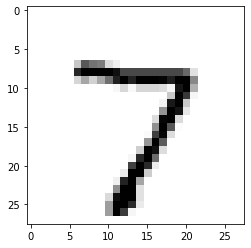

In [47]:
to_show = (x_test[0]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

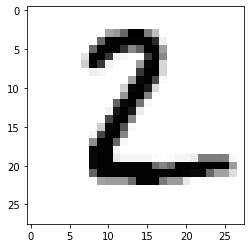

In [39]:
to_show = (x_test[1]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

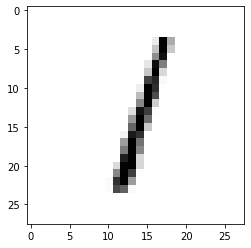

In [40]:
to_show = (x_test[2]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [ ]:
model.save("my_keras_model.h5")  # h5 es la extensiómn con la que se tienen que guardar los modelos de DL (de forma eficiente)
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")